# EXPREIMENT 1A - MLP with oversampling in training dataset

##### Importing the libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from IPython.display import display 
import pylab
from sklearn.compose import ColumnTransformer
import sklearn
import keras.layers as kl
from sklearn.utils import shuffle
import keras

##### Loading and cleaning the data

In [2]:
df_arsenic_prelim = pd.read_csv (r'C:\Users\Ryan\Desktop\Research\Data\Prelim-data\as.csv')

In [3]:
df_arsenic_prelim

,SiteID,As,X_Albers,Y_Albers,WellDepth,AvgAnnualN_CAFO_1992_97,AvgAnnualN_Fert_1992_2001,AWC,AWS25,BFI,...,Transmiss,TWI,VRT,VWC,YngWtrMeanAge,YngWtrMeanAge_VertMean,DTW,Data,as10,Pred
0,1,6.0,924000.0,2006000.0,105.912831,16.678065,48.483771,0.141277,5.384314,21.0,...,143.362904,9.902970,5.956547,0.304000,23.158235,17.689265,3.082386,train,0.0,0.00
1,2,1.0,892000.0,2080000.0,54.861323,7.688502,50.638261,0.217775,7.311919,37.0,...,137.152244,9.067347,4.196766,0.343552,22.015855,17.739371,3.076582,train,0.0,0.06
2,3,13.0,886000.0,2066000.0,34.745504,6.245885,43.503552,0.140200,5.400000,33.0,...,121.646066,11.470297,17.558480,0.270166,17.762669,15.950136,5.645093,train,1.0,0.83
3,4,1.0,898000.0,2076000.0,59.737885,4.900404,34.132068,0.154753,5.318469,37.0,...,298.232568,9.815662,1.231952,0.328985,27.709500,17.589893,1.044807,train,0.0,0.03
4,5,2.0,896000.0,2062000.0,45.717769,6.511748,45.355325,0.140200,5.400000,28.0,...,97.123320,9.435353,21.539828,0.268193,19.238581,14.557619,8.535328,train,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,1.0,610000.0,2484000.0,19.506248,8.030330,10.843744,0.159466,4.090000,59.0,...,115.224598,13.790910,0.416030,0.344196,8.765928,16.686542,0.188501,test,0.0,0.11
9998,9999,6.0,616000.0,2526000.0,24.992380,0.158934,0.199489,0.126106,4.030000,63.0,...,40.882361,11.154347,1.048951,0.253424,15.627269,11.281490,1.518130,test,0.0,0.01
9999,10000,0.0,602000.0,2586000.0,26.211521,0.004975,0.015434,0.126106,4.030000,66.0,...,59.112810,13.113131,0.520421,0.280687,21.815356,15.832110,0.643534,test,0.0,0.05
10000,10001,0.0,668000.0,2620000.0,12.496190,0.028986,0.058744,0.066700,2.000000,62.0,...,59.639661,12.550000,0.098656,0.367925,5.079691,14.141643,0.114506,test,0.0,0.01


In [4]:
df_arsenic_prelim.isnull().values.any()
df_arsenic_prelim.isnull().sum()
df_arsenic_prelim = df_arsenic_prelim.dropna()

In [5]:
df_arsenic_prelim.shape

(7616, 87)

In [6]:
X = df_arsenic_prelim.iloc[:,4:-3]
Y_TRUE = df_arsenic_prelim.iloc[:,1]
Y_PRED_BIN = df_arsenic_prelim.iloc[:,-2]
Y_PRED_CONTINUOUS = df_arsenic_prelim.iloc[:,-1]

In [7]:
X.shape

(7616, 80)

In [8]:
Y_TRUE
r = np.ptp(Y_TRUE)
print("Range:", r)
print("Max:",max(Y_TRUE))
print("Max:",min(Y_TRUE))

Range: 280.0
Max: 280.0
Max: 0.0


In [9]:
print('Shape of X: ', X.shape)
print('Shape of Y_TRUE: ', Y_TRUE.shape)
print('Shape of Y_PRED_BIN: ', Y_PRED_BIN.shape)
print('Shape of Y_PRED_CONFIDENCE: ', Y_PRED_CONTINUOUS.shape)

Shape of X:  (7616, 80)
Shape of Y_TRUE:  (7616,)
Shape of Y_PRED_BIN:  (7616,)
Shape of Y_PRED_CONFIDENCE:  (7616,)


##### Splitting the data into train and test

In [10]:
No_of_train_samples = int((X.shape[0] * 3) / 4)
remaining_samples = X.shape[0] - No_of_train_samples
TrainX = np.array(X.iloc[:No_of_train_samples,:])
TrainY = np.array(Y_TRUE)[:No_of_train_samples]

TestX = np.array(X.iloc[No_of_train_samples:,:])
TestY = np.array(Y_TRUE)[No_of_train_samples:]
Test_old_pred = np.array(Y_PRED_CONTINUOUS)[No_of_train_samples:]

##### Oversampling the train_data

In [11]:
TrainX.shape

(5712, 80)

In [12]:
TrainX_temp =  pd.DataFrame(data=TrainX, columns=X.columns)

In [13]:
TrainX_temp['As'] = TrainY

In [14]:
TrainX_temp

,WellDepth,AvgAnnualN_CAFO_1992_97,AvgAnnualN_Fert_1992_2001,AWC,AWS25,BFI,BottomAquiferDepth,BottomAquiferThick,C_Al,C_As,...,StrmDensity,SubsrfCntctTime,Transmiss,TWI,VRT,VWC,YngWtrMeanAge,YngWtrMeanAge_VertMean,DTW,As
0,105.912831,16.678065,48.483771,0.141277,5.384314,21.0,32.00,11.30,5.159124,12.070174,...,0.067079,16879.292680,143.362904,9.902970,5.956547,0.304000,23.158235,17.689265,3.082386,6.0
1,54.861323,7.688502,50.638261,0.217775,7.311919,37.0,26.21,10.49,5.425271,8.616256,...,0.045091,6868.292683,137.152244,9.067347,4.196766,0.343552,22.015855,17.739371,3.076582,1.0
2,34.745504,6.245885,43.503552,0.140200,5.400000,33.0,25.90,6.86,4.866556,7.348610,...,0.065535,22117.650000,121.646066,11.470297,17.558480,0.270166,17.762669,15.950136,5.645093,13.0
3,59.737885,4.900404,34.132068,0.154753,5.318469,37.0,19.20,15.34,5.425271,8.616256,...,0.090175,5731.195122,298.232568,9.815662,1.231952,0.328985,27.709500,17.589893,1.044807,1.0
4,45.717769,6.511748,45.355325,0.140200,5.400000,28.0,24.38,12.11,4.194549,6.013048,...,0.118289,2241.000000,97.123320,9.435353,21.539828,0.268193,19.238581,14.557619,8.535328,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,13.105760,0.000000,0.000000,0.186081,5.640000,49.0,32.00,9.69,7.309581,7.544010,...,0.108167,232.000000,43.910531,8.595918,17.091774,0.317946,11.586850,12.488755,29.686009,9.0
5708,42.669918,0.000000,0.000000,0.186081,5.640000,49.0,24.68,15.34,7.309581,7.544010,...,0.112736,232.000000,59.775724,8.772000,2.288920,0.385477,13.179888,17.785511,4.281054,6.0
5709,20.572996,0.063052,0.219718,0.085234,3.980000,76.0,2.74,11.71,7.684737,4.484164,...,0.080041,20.380952,18.103908,9.821649,2.375878,0.258359,23.140143,18.060309,3.256990,3.0
5710,12.496190,0.000000,0.000000,0.186081,5.640000,49.0,29.87,9.28,7.699320,8.899213,...,0.114225,232.000000,51.502025,8.153000,9.602142,0.322142,11.171461,17.833561,17.529744,11.0


In [15]:
df_arsenic_prelim = TrainX_temp
df_10_to_25 = pd.DataFrame()
df_25_to_50 = pd.DataFrame()
df_50_to_100 = pd.DataFrame()
df_above_100 = pd.DataFrame() 

for i in range(df_arsenic_prelim.shape[0]):
    val = df_arsenic_prelim.iloc[i]['As']
    if 10 < val < 25:
        df_10_to_25 = df_10_to_25.append(df_arsenic_prelim.iloc[i])
    elif 25 < val < 50:
        df_25_to_50 = df_25_to_50.append(df_arsenic_prelim.iloc[i])
    elif 50 < val < 100:
        df_50_to_100 = df_50_to_100.append(df_arsenic_prelim.iloc[i])
    elif val > 100:
        df_above_100 = df_above_100.append(df_arsenic_prelim.iloc[i]) 

In [16]:
df_balanced_1 = pd.DataFrame()
#2,3,5,25

df_balanced_1 = df_balanced_1.append([df_10_to_25]*5)
df_balanced_1 = df_balanced_1.append([df_25_to_50]*8)
df_balanced_1 = df_balanced_1.append([df_50_to_100]*10)
df_balanced_1 = df_balanced_1.append([df_above_100]*30)
df_balanced_1.shape

(4632, 81)

In [17]:
df_balanced_1

,WellDepth,AvgAnnualN_CAFO_1992_97,AvgAnnualN_Fert_1992_2001,AWC,AWS25,BFI,BottomAquiferDepth,BottomAquiferThick,C_Al,C_As,...,StrmDensity,SubsrfCntctTime,Transmiss,TWI,VRT,VWC,YngWtrMeanAge,YngWtrMeanAge_VertMean,DTW,As
2,34.745504,6.245885,43.503552,0.140200,5.400000,33.0,25.90,6.86,4.866556,7.348610,...,0.065535,22117.650000,121.646066,11.470297,17.558480,0.270166,17.762669,15.950136,5.645093,13.0
54,55.775678,25.739285,59.777201,0.155308,4.660000,46.0,16.15,4.84,3.959868,5.430375,...,0.000000,601.000000,270.735863,9.848958,3.451647,0.283160,20.659734,17.304256,3.546806,14.0
56,62.480951,24.086462,55.938680,0.146762,5.080784,47.0,47.54,6.05,4.068086,5.666603,...,0.023082,943.000000,116.548961,9.808163,6.727938,0.256678,25.487637,16.523225,6.246579,14.0
71,26.821091,19.214488,49.705075,0.103134,3.239200,67.0,24.68,9.69,3.470435,4.712856,...,0.074355,512.000000,309.981957,10.011000,3.760686,0.252461,10.411219,16.206637,5.168996,20.0
76,30.478513,22.268073,57.604260,0.150470,5.520000,66.0,16.76,11.30,3.276386,3.975524,...,0.055811,458.925000,181.613303,9.161616,11.476359,0.251809,6.260919,14.962004,8.805068,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,54.861323,0.986283,62.109270,0.174354,4.880000,27.0,30.48,14.53,4.359010,8.387321,...,0.060446,442.357143,2915.174716,10.737501,49.185336,0.268255,7.411820,16.192014,6.507833,101.0
3302,18.287108,2.216946,63.306051,0.097286,3.050000,34.0,9.14,14.13,3.665549,3.363381,...,0.000342,1682.292683,284.990701,11.373999,4.719260,0.255643,13.436427,21.904810,2.946778,128.0
3735,16.153612,6.167275,85.076774,0.131609,4.604000,26.0,6.09,5.24,6.889934,19.334936,...,0.123126,2477.209302,145.175903,9.927273,8.820678,0.331771,31.908611,21.329399,2.657673,225.0
4877,4.571777,0.093395,1.171012,0.122901,3.750000,32.0,0.45,8.27,5.296440,10.518550,...,0.174316,171.000000,665.344727,12.974747,0.511656,0.335629,8.738865,13.505758,0.706900,127.0


In [18]:
df_arsenic_prelim = df_arsenic_prelim.append(df_balanced_1)
df_arsenic_prelim = shuffle(df_arsenic_prelim)

In [19]:
df_arsenic_prelim.shape

(10344, 81)

In [20]:
TrainX = np.array(df_arsenic_prelim.iloc[:,:-1])
TrainY = np.array(df_arsenic_prelim.iloc[:,-1])

##### Scaling the data using standard_scaler transformer

In [21]:
scaler_1 = sklearn.preprocessing.StandardScaler()
#scaler_1 = sklearn.preprocessing.MinMaxScaler()
scaler_1 = scaler_1.fit(TrainX)
TrainX = scaler_1.transform(TrainX)
TestX = scaler_1.transform(TestX)
scaler_2 = sklearn.preprocessing.StandardScaler()
#scaler_2 = sklearn.preprocessing.MinMaxScaler()
scaler_2 = scaler_2.fit(TrainY.reshape(-1,1))
TrainY = scaler_2.transform(TrainY.reshape(-1,1))
TestY = scaler_2.transform(TestY.reshape(-1,1))
TrainY = TrainY.reshape(-1)
TestY = TestY.reshape(-1)

In [22]:
print('Shape of TrainX: ', TrainX.shape)
print('Shape of TestX: ', TestX.shape)
print('Shape of TrainY: ', TrainY.shape)
print('Shape of TestY: ', TestY.shape) 

Shape of TrainX:  (10344, 80)
Shape of TestX:  (1904, 80)
Shape of TrainY:  (10344,)
Shape of TestY:  (1904,)


##### Defining the MLP model

In [23]:
optimizer1 = tf.keras.optimizers.SGD(learning_rate=1e-6,momentum=0.9999,nesterov=True,name='SGD')
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(80)))
model.add(tf.keras.layers.Dense(200,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(80,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(75,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(54,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(32,activation='selu',kernel_initializer=tf.keras.initializers.LecunNormal))
model.add(tf.keras.layers.Dense(1,kernel_initializer=tf.keras.initializers.GlorotUniform ))
model.compile(optimizer=optimizer1, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               16200     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                16080     
_________________________________________________________________
dense_2 (Dense)              (None, 75)                6075      
_________________________________________________________________
dense_3 (Dense)              (None, 54)                4104      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1760      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 44,252
Trainable params: 44,252
Non-trainable params: 0
____________________________________________________

##### Training the model

In [61]:
history = model.fit(TrainX, TrainY, epochs=500,validation_split=0.05, verbose=1)

Epoch 1/500
308/308 [==============================] - 1s 2ms/step - loss: 0.0027 - val_loss: 0.0052
Epoch 2/500
308/308 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0055
Epoch 3/500
308/308 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0053
Epoch 4/500
308/308 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0056
Epoch 5/500
308/308 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0051
Epoch 6/500
308/308 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0055
Epoch 7/500
308/308 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0053
Epoch 8/500
308/308 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0057
Epoch 9/500
308/308 [==============================] - 0s 1ms/step - loss: 0.0024 - val_loss: 0.0050
Epoch 10/500
308/308 [==============================] - 0s 1ms/step - loss: 0.0024 - val_lo

KeyboardInterrupt: 

##### Saving and/or loading the model

In [94]:
#model.save(r'C:\Users\Ryan\Desktop\Research\Experiment1_oversampled_model')
model = keras.models.load_model(r'C:\Users\Ryan\Desktop\Research\Experiment1_oversampled_model')

##### Making predictions using model

In [62]:
preds = model.predict(TrainX)
preds.shape
preds

array([[ 0.50990576],
       [-0.06501304],
       [-0.67870355],
       ...,
       [-0.2828486 ],
       [-0.6284602 ],
       [-0.5240265 ]], dtype=float32)

In [63]:
r = np.ptp(TrainY)
print("Range:", r)
print("Max:",max(TrainY))
print("Min:",min(TrainY))

Range: 9.851995900465045
Max: 9.190454404113039
Min: -0.6615414963520063


In [64]:
results = model.evaluate(TestX, TestY)

60/60 [==============================] - 0s 3ms/step - loss: 0.0204


## Evaluation of model performance and visualization of results

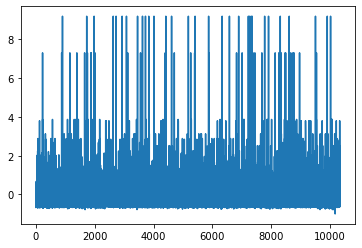

In [65]:
preds = model.predict(TrainX)
TestY
x_pts = np.arange(0,TrainX.shape[0],1)
plt.plot(x_pts,preds)

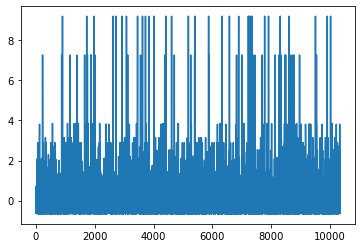

In [66]:
plt.plot(x_pts,TrainY)

In [67]:
TestX.shape

(1904, 80)

##### Plot of predicted values (before scaling back)

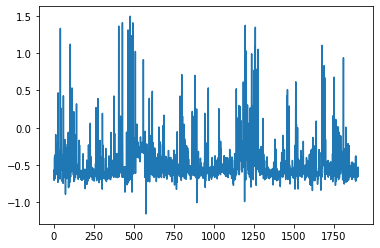

In [68]:
TEST_preds = model.predict(TestX)
x_pts = np.arange(0,TestY.shape[0] ,1)
plt.plot(x_pts,TEST_preds)

##### Plot of true values (before scaling back)

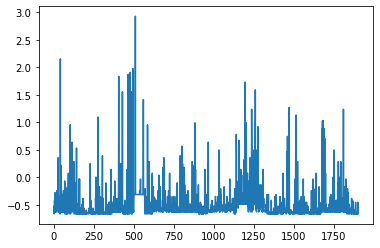

In [69]:
plt.plot(x_pts,TestY)

##### Inverse transform

In [70]:
TestY_final = scaler_2.inverse_transform(TestY.reshape(-1,1))
TEST_preds_final = scaler_2.inverse_transform(TEST_preds.reshape(-1,1))
TestY_final = TestY_final.reshape(-1)
TEST_preds_final = TEST_preds_final.reshape(-1)

for i in range(TEST_preds_final.shape[0]):
    if TEST_preds_final[i] < 0:
        TEST_preds_final[i] = 0   

##### Plot of predicted values and true values (after scaling back)

<function matplotlib.pyplot.legend(*args, **kwargs)>

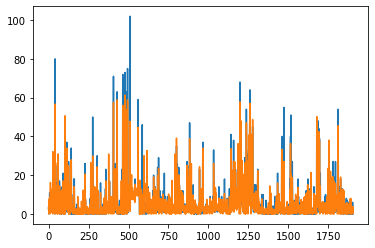

In [96]:
plt.plot(x_pts,TestY_final,TEST_preds_final)
plt.legend

##### Plot to show the margin of error between predicted values and true values in regression model

Text(0.5, 1.0, 'Error within and outside tolerance value of 10')

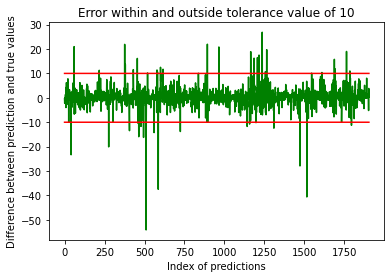

In [74]:
constant_10 = np.full(TestX.shape[0] ,10)
constant_neg_10 = np.full(TestX.shape[0] ,-10)
plt.plot(x_pts,TEST_preds_final-TestY_final,color='green')
plt.plot(x_pts,constant_10,color="red")
plt.plot(x_pts,constant_neg_10,color='red')
plt.xlabel("Index of predictions")
plt.ylabel("Difference between prediction and true values")
plt.title("Error within and outside tolerance value of 10")

In [75]:
TestY_final = TestY_final.reshape(-1)
TEST_preds_final = TEST_preds_final.reshape(-1)
print("The shape of the test predictions",TEST_preds_final.shape)
print("The shape of the True values of test",TestY_final.shape)
print("The shape of the ML-model prediction values of Y",Test_old_pred.shape) 

The shape of the test predictions (1904,)
The shape of the True values of test (1904,)
The shape of the ML-model prediction values of Y (1904,)


##### Calculation of accuracy in binary classification by MLP model

In [76]:
DL_binary_right_predition = 0
DL_binary_wrong_predition = 0
dl_threshold = 9
for i in range(TEST_preds_final.shape[0]):
    if ((TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10) or (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10)):
        DL_binary_right_predition+=1
    else:
        DL_binary_wrong_predition+=1

In [77]:
print("Prediction ", "True") 
for i in range(TEST_preds_final.shape[0]):
    if not ((TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10) or (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10)):
        if (TEST_preds_final[i]-TestY_final[i] > 10):
            print(TEST_preds_final[i],"  ",TestY_final[i]) 

Prediction  True
12.274799    1.0
30.899212    9.0
14.704845    1.0
17.551695    6.0
17.135431    1.0
11.40376    0.0
12.65011    2.0
13.504685    1.0
11.064521    1.0
25.954266    4.000000000000002
29.825949    9.0
26.918848    8.0
21.479473    5.0
20.502708    3.0000000000000018
35.8616    9.0
10.12229    0.0
10.373798    0.0
20.886553    9.0
21.995726    3.0000000000000018
17.007105    6.0


##### *Calculation of balanced accuracy score by MLP model and random forest model

In [78]:
TestY_final.shape
#TEST_preds_final.shape
sample_weights = np.ones(TestY_final.shape[0])

In [79]:
for i in range(TestY_final.shape[0]):
    val = TestY_final[i] 
    if 10 < val < 25:
        sample_weights[i] = 5
    elif 25 < val < 50:
        sample_weights[i] = 8
    elif 50 < val < 100:
        sample_weights[i] = 10
    elif val > 100:
        sample_weights[i] = 30

In [80]:
from sklearn.metrics import balanced_accuracy_score

In [81]:
TestY_final_bin = np.ones(TestY_final.shape[0])
TestY_pred_bin = np.ones(TestY_final.shape[0])
ML_pred = np.ones(TestY_final.shape[0])

In [82]:
for i in range(TestY_final.shape[0]):
    if TestY_final[i]<10:
        TestY_final_bin[i]=0
    if TEST_preds_final[i]<10:
        TestY_pred_bin[i]=0
    if Test_old_pred[i]<0.5:
        ML_pred[i] = 0

### The balanced accuracy score for our MLP model

In [83]:
balanced_accuracy_score(TestY_final_bin, TestY_pred_bin,sample_weight=sample_weights)


0.9112768458403366

### The balanced accuracy score for the random forest model

In [84]:
balanced_accuracy_score(TestY_final_bin, ML_pred,sample_weight=sample_weights)

0.7260730097002054

### The generic accuracy score of MLP model

In [85]:
dl_acc = DL_binary_right_predition/TestY_final.shape[0] * 100
print("Deep learning accuracy is:", dl_acc)

Deep learning accuracy is: 93.75


In [86]:
ML_binary_right_predition = 0
ML_binary_wrong_predition = 0
ml_threshold = 0.5
for i in range(TEST_preds_final.shape[0]):
    if ((Test_old_pred[i] >= ml_threshold and TestY_final[i] > 10) or (Test_old_pred[i] < ml_threshold and TestY_final[i] < 10)):
        ML_binary_right_predition+=1
    else:
        ML_binary_wrong_predition+=1

### The generic accuracy score of random forest model

In [87]:
ml_acc = ML_binary_right_predition/TestY_final.shape[0] * 100
print("Machine learning accuracy is:",ml_acc)

Machine learning accuracy is: 87.44747899159664


In [88]:
DL_true_positive = 0
DL_true_negative = 0
DL_false_positive = 0
DL_false_negative = 0
dl_threshold = 10


for i in range(TEST_preds_final.shape[0]):
    
    if (TEST_preds_final[i] >= dl_threshold and TestY_final[i] >= 10): 
        DL_true_positive+=1
    
    elif (TEST_preds_final[i] < dl_threshold and TestY_final[i] < 10):
        DL_true_negative+=1
        
    elif (TEST_preds_final[i] >= dl_threshold and TestY_final[i] < 10):
        DL_false_positive+=1
        
    else:
        DL_false_negative+=1
        
DL_true_positive = DL_true_positive/TestY_final.shape[0] * 100
DL_true_negative = DL_true_negative/TestY_final.shape[0] * 100
DL_false_positive = DL_false_positive/TestY_final.shape[0] * 100
DL_false_negative = DL_false_negative/TestY_final.shape[0] * 100
DL_false_positive

2.9936974789915967

##### Calculation of confusion matrix parameters of MLP and Random forest model

In [89]:
ML_true_positive = 0
ML_true_negative = 0
ML_false_positive = 0
ML_false_negative = 0
ml_threshold = 0.5

for i in range(TEST_preds_final.shape[0]):
    
    if (Test_old_pred[i] >= ml_threshold and TestY_final[i] >= 10): 
        ML_true_positive+=1
    
    elif (Test_old_pred[i] < ml_threshold and TestY_final[i] < 10):
        ML_true_negative+=1
        
    elif (Test_old_pred[i] >= ml_threshold and TestY_final[i] < 10):
        ML_false_positive+=1

    else:
        ML_false_negative+=1
        
ML_true_positive = ML_true_positive/TestY_final.shape[0] * 100
ML_true_negative = ML_true_negative/TestY_final.shape[0] * 100
ML_false_positive = ML_false_positive/TestY_final.shape[0] * 100
ML_false_negative = ML_false_negative/TestY_final.shape[0] * 100
ML_false_positive

2.100840336134454

In [90]:
ML_false_negative

10.241596638655462

### Confusion matrix plot of MLP and random-forest models

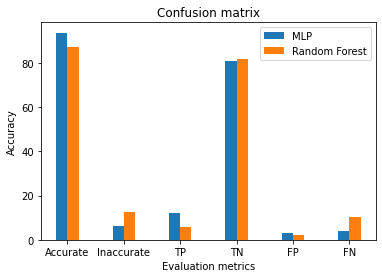

In [91]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Accurate', 'Inaccurate' , 'TP','TN','FP','FN']
dl = [dl_acc, (100 - dl_acc), DL_true_positive,DL_true_negative,DL_false_positive,DL_false_negative]
ml = [ml_acc, (100 - ml_acc), ML_true_positive,ML_true_negative,ML_false_positive,ML_false_negative]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, dl, 0.2, label = 'MLP')
plt.bar(X_axis + 0.1, ml, 0.2, label = 'Random Forest')
  
plt.xticks(X_axis, X)
plt.xlabel("Evaluation metrics")
plt.ylabel("Accuracy")
plt.title("Confusion matrix")
plt.legend()
plt.show()

### Generic accuracy score in the event of a multi-class classification for the MLP model

In [92]:
DL_0_to_10 = 0
DL_10_to_25 = 0
DL_25_to_50 = 0
DL_50_to_100 = 0
DL_above_100 = 0

for i in range(TEST_preds_final.shape[0]):
    
    
    if (0  <= TEST_preds_final[i] <= 10 and 0 <= TestY_final[i] <= 10):
        DL_0_to_10+=1
    
    elif (10 < TEST_preds_final[i] <= 25 and 10 < TestY_final[i] <= 25): 
        DL_10_to_25+=1
    
    elif (25 < TEST_preds_final[i] <= 50 and 25 < TestY_final[i] <= 50):
        DL_25_to_50+=1
        
    elif(50 < TEST_preds_final[i] <= 100 and 50 < TestY_final[i] <= 100):
        DL_50_to_100+=1
        
    elif((100 < TEST_preds_final[i] and 100 < TestY_final[i])):
        DL_above_100+=1

In [93]:
(DL_0_to_10 + DL_10_to_25 + DL_25_to_50 + DL_50_to_100 + DL_above_100) / TEST_preds_final.shape[0] * 100

91.22899159663865